라이브러리 로드

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


학습,예측 데이터셋 나누기

In [45]:
(df["Insulin"]>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [46]:
#train 세트를 만들기
train = df[df["Insulin"]>0].copy()
train.shape

(394, 9)

In [47]:
#test 세트를 만들기

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

EDA

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

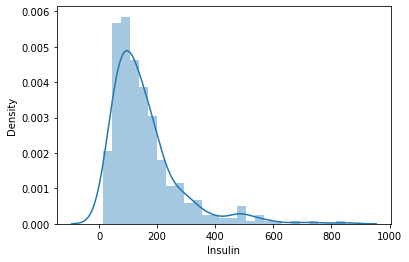

In [48]:
sns.distplot(train["Insulin"])

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

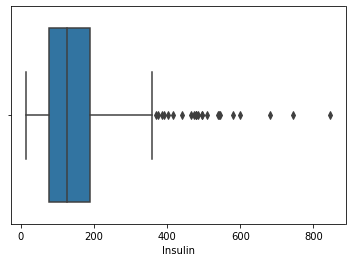

In [49]:
sns.boxplot(train["Insulin"])

In [50]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [51]:
#IQR : 3IQR-1IQR
#OUT > 3IQR+(IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR*1.5)

In [52]:
train[train["Insulin"]>OUT].shape

(24, 9)

In [53]:
print(train.shape)
train = train[train["Insulin"]<OUT]
train.shape

(394, 9)


(370, 9)

학습,예측에 사용할 컬럼

In [54]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

정답값이자 예측해야될값

In [55]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Insulin"
label_name

'Insulin'

학습,예측 데이터셋만들기

In [56]:
#학습세트만들기
X_train = train[feature_names]
X_train.shape

(370, 8)

In [57]:
#정답값 만들기
y_train = train[label_name]
y_train.shape

(370,)

In [58]:
#예측에 사요할 데이터세트
X_test = test[feature_names]
X_test.shape

(374, 8)

In [59]:

#예측의 정답값
y_test = test[label_name]
y_test.shape

(374,)

머신러닝 알고리즘 가져오기

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
                      RandomForestRegressor(random_state=42),
                      GradientBoostingRegressor(random_state=42)]
estimators


[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [61]:
max_depth = np.random.randint(5, 30, 10)
max_depth
 

array([11, 11, 24, 17,  6, 11,  5, 29,  5,  8])

In [62]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.63972163, 0.81222063, 0.8616861 , 0.95005594, 0.77784424,
       0.67760502, 0.87299554, 0.5947103 , 0.33386014, 0.48724567])

In [63]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [72]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []
    
    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)
    param_distributions = {"max_depth" : max_depth,
    "max_features" : max_features}

    regressor = RandomizedSearchCV(estimator,
    param_distributions,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    cv=5,
    verbose=2, random_state=42)

    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.6474914317028659, max_depth=18 ...................
[CV] .... max_features=0.6474914317028659, max_depth=18, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=18 ...................
[CV] .... max_features=0.6474914317028659, max_depth=18, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=18 ...................
[CV] .... max_features=0.6474914317028659, max_depth=18, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=18 ...................
[CV] .... max_features=0.6474914317028659, max_depth=18, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=18 ...................
[CV] .... max_features=0.6474914317028659, max_depth=18, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=5 ....................
[CV] ..... max_features=0.6474914317028659, max_depth=5, total=   0.0s
[CV] max_features=0.6474914317028659, max_depth=5 ....................
[CV] ..... max_f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=0.9941037647662272, max_depth=19 ...................
[CV] .... max_features=0.9941037647662272, max_depth=19, total=   0.0s
[CV] max_features=0.9941037647662272, max_depth=19 ...................
[CV] .... max_features=0.9941037647662272, max_depth=19, total=   0.0s
[CV] max_features=0.9941037647662272, max_depth=19 ...................
[CV] .... max_features=0.9941037647662272, max_depth=19, total=   0.0s
[CV] max_features=0.9941037647662272, max_depth=19 ...................
[CV] .... max_features=0.9941037647662272, max_depth=19, total=   0.0s
[CV] max_features=0.9941037647662272, max_depth=19 ...................
[CV] .... max_features=0.9941037647662272, max_depth=19, total=   0.0s
[CV] max_features=0.801018148602785, max_depth=19 ....................
[CV] ..... max_features=0.801018148602785, max_depth=19, total=   0.0s
[CV] max_features=0.801018148602785, max_depth=19 ....................
[CV] ..... max_features=0.801018148602785, max_depth=19, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=0.6135349600764552, max_depth=10, total=   0.3s
[CV] max_features=0.6135349600764552, max_depth=10 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_features=0.6135349600764552, max_depth=10, total=   0.3s
[CV] max_features=0.6135349600764552, max_depth=10 ...................
[CV] .... max_features=0.6135349600764552, max_depth=10, total=   0.2s
[CV] max_features=0.6135349600764552, max_depth=10 ...................
[CV] .... max_features=0.6135349600764552, max_depth=10, total=   0.2s
[CV] max_features=0.6135349600764552, max_depth=10 ...................
[CV] .... max_features=0.6135349600764552, max_depth=10, total=   0.3s
[CV] max_features=0.6135349600764552, max_depth=6 ....................
[CV] ..... max_features=0.6135349600764552, max_depth=6, total=   0.2s
[CV] max_features=0.6135349600764552, max_depth=6 ....................
[CV] ..... max_features=0.6135349600764552, max_depth=6, total=   0.2s
[CV] max_features=0.6135349600764552, max_depth=6 ....................
[CV] ..... max_features=0.6135349600764552, max_depth=6, total=   0.2s
[CV] max_features=0.6135349600764552, max_depth=6 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.58234065269378, max_depth=27 .....................
[CV] ...... max_features=0.58234065269378, max_depth=27, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=27 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...... max_features=0.58234065269378, max_depth=27, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=27 .....................
[CV] ...... max_features=0.58234065269378, max_depth=27, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=27 .....................
[CV] ...... max_features=0.58234065269378, max_depth=27, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=27 .....................
[CV] ...... max_features=0.58234065269378, max_depth=27, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=8 ......................
[CV] ....... max_features=0.58234065269378, max_depth=8, total=   0.2s
[CV] max_features=0.58234065269378, max_depth=8 ......................
[CV] ....... max_features=0.58234065269378, max_depth=8, total=   0.1s
[CV] max_features=0.58234065269378, max_depth=8 ......................
[CV] ....... max_features=0.58234065269378, max_depth=8, total=   0.1s
[CV] max_features=0.58234065269378, max_depth=8 ......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.2s finished


In [74]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv


,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.6474914317028659, 'max_dept...","DecisionTreeRegressor(max_depth=5, max_feature...",0.160619,"{'mean_fit_time': [0.007997083663940429, 0.007..."
1,RandomForestRegressor,"{'max_features': 0.6135349600764552, 'max_dept...","(DecisionTreeRegressor(max_depth=6, max_featur...",0.344629,"{'mean_fit_time': [0.23652281761169433, 0.2097..."
2,GradientBoostingRegressor,"{'max_features': 0.6364613948518949, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.286538,"{'mean_fit_time': [0.1759408950805664, 0.16534..."


In [75]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=6, max_features=0.6135349600764552,
                      random_state=42)

10  학습(훈련)
시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [76]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=0.6135349600764552,
                      random_state=42)

cross validation 으로 학습 세트의 오차 측정하기

In [89]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train,y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


array([ 56.37916451, 172.13736646, 101.49360914, 146.13395087,
       174.56857795])

In [90]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

0

In [91]:
len(y_train)

370

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

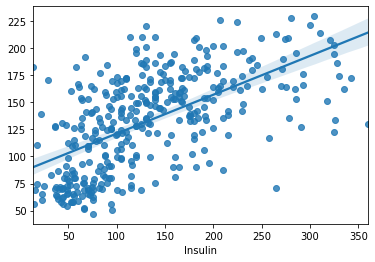

In [92]:
# regplot 으로 결과 값을 비교합니다
sns.regplot(y_train, y_predict)

In [93]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

0.35789116266476184

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

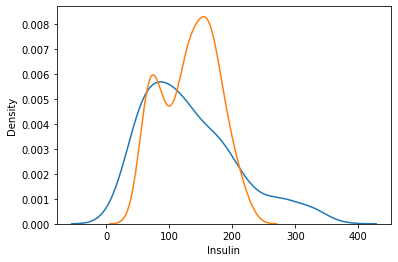

In [94]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label=("train"))
sns.distplot(y_predict, hist=False, label=("predict"))

12  오차 구하기

In [95]:
#MAE 에러의 평균오차
#86
#77.56
#62.056
#44.225
error = abs(y_train - y_predict)
error.mean()

44.225334696789815

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

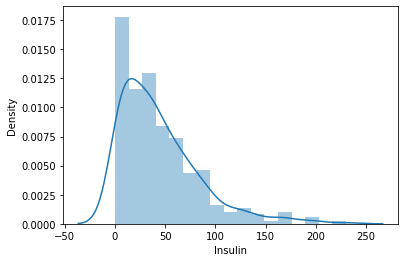

In [96]:
sns.distplot(error)

In [97]:
error.describe()

count    370.000000
mean      44.225335
std       39.776640
min        0.150301
25%       14.236732
50%       35.348911
75%       62.774764
max      229.900768
Name: Insulin, dtype: float64

In [98]:
#RMSE 표준편차 랑 비슷
#126.895
#114.077
#84.111
#59.44
np.sqrt(((y_train - y_predict) ** 2).mean())

59.445648883696606

트리알고리즘 분석하기

In [87]:
#plot_tree로 시각화 하기
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20)) 
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1440x1440 with 0 Axes>

In [99]:
#피처의 중요도 추출하기
best_estimator.feature_importances_

array([0.03496635, 0.45910626, 0.04677642, 0.08234426, 0.12720491,
       0.08295684, 0.10406206, 0.06258289])

<AxesSubplot:>

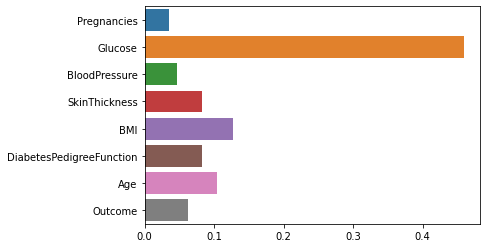

In [100]:
#피처의 중요도 시각화하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

예측

In [101]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([192.91849016,  65.08177431, 198.44055323, 162.93084574,
       164.65312288])

In [102]:
train.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,115.917323,100
1,169.163793,160


In [103]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [104]:
test["Insulin"] = y_test

In [105]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,136.131799,44.360971,56.379397,97.865916,137.851460,174.266838,234.155402
1,138.0,174.605550,24.962925,102.084519,163.619808,176.479552,189.288567,241.604986


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

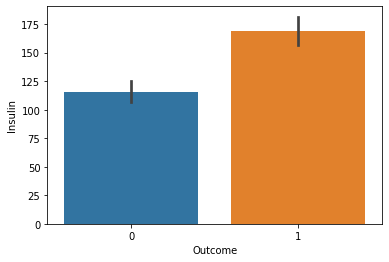

In [72]:
#Insulin 평균값 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

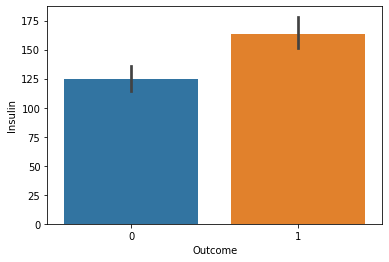

In [73]:
#예측값에 대해서 시각화
sns.barplot(data=test, x="Outcome", y="Insulin")

예측값 CSV파일로 저장하기

In [106]:
df.loc[df["Insulin"] == 0, "Insulin"]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [107]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [109]:
df.to_csv("data/diabetes_fill_insulin.csv",index=False)

In [110]:
pd.read_csv("data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,192.918490,33.6,0.627,50,1
1,1,85,66,29,65.081774,26.6,0.351,31,0
2,8,183,64,0,198.440553,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,161.792595,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,175.557533,30.1,0.349,47,1
